# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">EDA</p>

### Import libraries

In [3]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

<h1 class="alert alert-info">
Data Analysis and Data Pre-processing</h1>

In [4]:
# load dataset
df = pd.read_csv("../data/merged_dataset.csv")

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(4954, 58)


,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
0,2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,1.913919,19.003739,8.3,8.3,9.1903,10.1577,149.221429,143.795302,195.967993,217.586787,154.886878,220.739292,221.791454,159.765023,144.060768,218.645681,170.049137,145.380741,37033.050781,5521.850098,14106.230469,21529.349609,16027.469727,6307.509766,47830.968750,2346.370117,999.260010,8294.540039,120.660004,496.679993,2763.070068,25607.640625,3436.810059,21479.500000,983.539978,4306.149902,8853.259766,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
1,2021-12-31,13358.32,13425.50,13352.00,13404.63,13404.63,-0.35,330.831808,12.008623,15.920088,281.985439,1.913919,19.003739,8.3,8.3,9.1858,10.1527,149.221429,143.795302,195.967993,217.586787,154.886878,220.739292,221.791454,159.765023,144.060768,218.645681,170.049137,145.380741,37033.050781,5521.850098,14106.230469,21529.349609,16027.469727,6307.509766,47830.968750,2346.370117,999.260010,8294.540039,120.660004,496.679993,2763.070068,25607.640625,3436.810059,21479.500000,983.539978,4306.149902,8853.259766,1001.080017,5008.120117,29.809999,2046.709961,2562.300049,1.456,14202.0,1.5,4917.0,8607.0
2,2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.697598,11.983168,15.826980,281.982649,1.912748,18.992053,8.3,8.3,9.1885,10.1558,149.215415,143.789199,196.029692,217.577083,154.845752,220.725313,222.175406,159.762841,144.054723,216.823343,170.085174,145.361942,37488.011719,5512.000000,14094.629883,21484.810547,15839.519531,6539.520020,47968.441406,2458.100098,998.369995,8280.480469,122.169998,468.630005,2808.389893,26085.660156,3493.129883,21754.500000,987.500000,4369.229980,9091.240234,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
3,2021-12-30,13404.63,13405.19,13340.30,13389.20,13389.20,0.12,330.563387,11.957713,15.733872,281.979859,1.911576,18.980367,8.3,8.3,9.1888,10.1560,149.215415,143.789199,196.029692,217.577083,154.845752,220.725313,222.175406,159.762841,144.054723,216.823343,170.085174,145.361942,37488.011719,5512.000000,14094.629883,21484.810547,15839.519531,6539.520020,47968.441406,2458.100098,998.369995,8280.480469,122.169998,468.630005,2808.389893,26085.660156,3493.129883,21754.500000,987.500000,4369.229980,9091.240234,996.340027,5008.120117,29.820000,2043.770020,2562.300049,1.437,8915.0,1.5,5357.0,9287.0
4,2021-12-29,13389.20,13389.70,13280.96,13281.80,13281.80,0.81,330.429177,11.932258,15.640763,281.977069,1.910405,18.968682,8.3,8.3,9.1958,10.1638,149.210740,143.783095,195.939486,217.462340,154.885255,220.503661,220.706776,159.799980,144.049648,217.460305,169.985386,145.374614,37365.700521,5481.500000,14059.500000,21509.109375,15881.440430,6539.520020,47007.371094,2469.270020,993.010010,8320.980469,119.190002,475.640015,2809.610107,26048.119141,3544.270020,22290.439453,1041.670044,4323.080078,9165.120117,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 58 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DATE                                                   4954 non-null   object 
 1   COURS_CLOTURE                                          4954 non-null   float64
 2   COURS_PLUS_HAUT                                        4954 non-null   float64
 3   COURS_PLUS_BAS                                         4954 non-null   float64
 4   COURS_OUVERTURE                                        4954 non-null   float64
 5   COURS_VEILLE                                           4954 non-null   float64
 6   VARIATION                                              4954 non-null   float64
 7   AVOIRS_OFFICIELS_DE_RESERVE                            4954 non-null   float64
 8   OR_MONETAIRE                                    

In [6]:
df.describe()

,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,11141.906562,11183.075748,11097.394868,11138.387386,11141.644210,0.000391,316.604041,12.839176,16.596309,270.858272,1.973388,14.340424,6.743538,6.502189,9.475000,10.472360,149.945512,145.431621,184.138799,196.972763,154.316090,198.062705,194.381469,157.896661,145.544955,189.519182,165.433261,146.662701,33049.474599,4721.467484,12726.869303,17218.594403,15155.213056,5185.222826,40022.378004,2276.526503,3082.466110,6405.178149,90.267525,604.879567,2532.422278,28212.365190,3224.332995,17328.645444,1218.334501,3730.831822,7882.979567,992.413915,4683.117901,29.163413,1723.381816,2365.872314,2.157467,9153.434800,2.125823,3916.928139,8558.208317
std,1247.005695,1252.684757,1245.674897,1250.338045,1248.161321,0.430973,29.080374,0.980293,4.438486,22.289963,0.041509,4.918032,1.819133,1.500920,0.196080,0.216724,1.725239,2.174413,8.562698,13.880892,1.437461,18.080962,20.457512,1.617119,2.048259,22.128975,3.105077,1.935506,2682.555629,336.577490,742.744833,1823.837935,1129.408014,952.858781,4444.074194,160.910328,1532.208948,1551.836681,22.592317,141.301341,104.913268,3571.375187,841.454890,1725.222266,130.567367,382.071054,516.618675,57.278646,505.250853,6.401620,256.709442,99.112743,0.524261,2266.408349,0.546072,1212.671180,1707.144606
min,8796.650391,8837.969727,8789.889648,8796.650391,8796.650391,-3.820000,247.751000,10.560000,6.992000,218.044000,1.873272,6.852960,3.100000,3.900000,9.114000,10.073300,146.923866,141.763410,167.101247,170.031985,151.949788,164.751137,158.038257,154.613067,142.045887,151.231700,158.506218,143.332301,13969.669922,4037.669922,10631.299805,12520.940430,12944.040039,3769.370000,30901.400000,1970.949951,897.700012,2966.030000,62.970001,438.980011,2237.090088,21182.900000,2213.129883,14934.350000,893.750000,2784.620117,6668.729980,896.780000,3090.860107,17.330000,1108.850000,1935.900024,1.299000,2965.000000,1.500000,1201.000000,4293.000000
25%,10043.410156,10104.460205,10005.339844,10040.910000,10043.215039,-0.005388,298.833848,12.248317,14.070245,255.962051,1.945196,9.229036,5.263158,5.100000,9.351499,10.335881,148.800318,143.905323,177.061697,184.046189,153.087808,180.779255,174.589022,156.433279,144.134359,167.742195,163.650189,145.374644,31267.490530,4497.19187

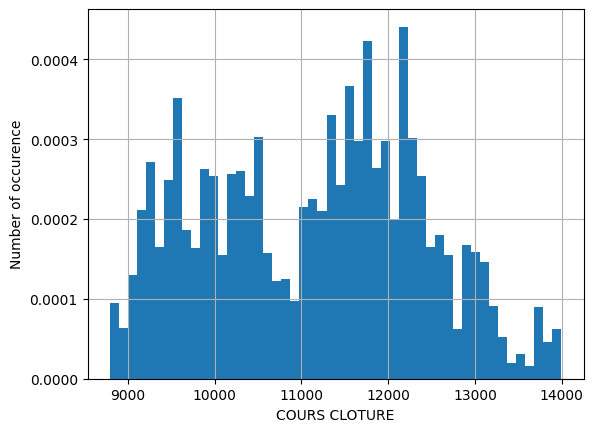

In [8]:
# histogran to evaluate target distribution

df['COURS_CLOTURE'].hist(bins=50, density=True)
plt.ylabel('Number of occurence')
plt.xlabel('COURS CLOTURE')
plt.show()

<h3 class="alert alert-info">
Feature Enginnering<h3>

<div class="alert alert-info">
Missing value<div>

We are already filling the missing values in the last notebook

In [9]:
df.isna().sum().sum()

0

<div class="alert alert-info">
Outliers<div>

- Identify outliers using statistical methods (e.g., Z-score or IQR).
- Remove the rows containing outliers.

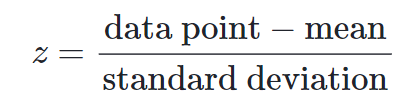

In [10]:
# from scipy import stats

# z_scores = stats.zscore(df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]

<div class="alert alert-info">
DateTime variables<div>

Day, month, semester, hour, min, s

In [11]:
import pandas as pd
import numpy as np

def process_features(df):
    
    # Convert to datetime
#     df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort by date
    df = df.sort_values(by='DATE', ascending=True)
    
    # Time-Based Features
    df['month'] = pd.to_datetime(df['DATE']).dt.month
    df['weekday'] = pd.to_datetime(df['DATE']).dt.dayofweek
    df["weekend"] = df['weekday'] > 4
#     df['hour'] = pd.to_datetime(df['DATE']).dt.hour
#     df['minute'] = pd.to_datetime(df['DATE']).dt.minute 
#     df.set_index('DATE', inplace=True)
    
    # Season feature
    df['Season'] = np.where(df['month'].isin([3, 4, 5]), 'Spring',
                            np.where(df['month'].isin([6, 7, 8]), 'Summer',
                            np.where(df['month'].isin([9, 10, 11, 12, 1, 2]), 'Fall', 'Winter')))

    
    
    # One-Hot Encoding for categorical columns
#     df = pd.get_dummies(df, columns=['Season', 'day', 'category_1', 'category_2'])
        
    return df

In [12]:
df = process_features(df)
df.head()

,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season
177,2013-12-06,9240.41,9340.03,9240.39,9310.02,9327.31,-0.009317,349.865853,14.191342,11.426886,303.314222,1.977989,18.955415,8.3,8.3,9.365992,10.351875,154.593025,150.414897,180.678428,187.229134,158.508979,180.604453,172.518633,161.286817,150.336228,163.936077,167.263579,151.370658,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,Fall
176,2013-12-09,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057,349.470283,14.174735,11.512905,302.931208,1.977482,18.873953,8.3,8.3,9.364884,10.350650,154.547102,150.363092,180.738401,187.356265,158.469820,180.797419,172.742118,161.257384,150.286585,164.195697,167.257344,151.322524,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,Fall
175,2013-12-10,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169,349.074712,14.158127,11.598925,302.548194,1.976975,18.792491,8.3,8.3,9.363775,10.349425,154.501179,150.311287,180.798374,187.483396,158.430662,180.990385,172.965602,161.227952,150.236942,164.455318,167.251109,151.274390,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,Fall
174,2013-12-11,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179,348.679142,14.141520,11.684944,302.165180,1.976468,18.711030,8.3,8.3,9.362667,10.348199,154.455256,150.259481,180.858347,187.610527,158.391504,181.183351,173.189086,161.198519,150.187300,164.714938,167.244873,151.226256,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,Fall
173,2013-12-12,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388,348.283571,14.124913,11.770964,301.782166,1.975960,18.629568,8.3,8.3,9.361559,10.346974,154.409333,150.207676,180.918319,187.737658,158.352345,181.376317,173.412570,161.169087,150.137657,164.974558,167.238638,151.178122,31781.260714,4992.005,13331.551905,185

### Encode variables

In [13]:
# Encode 'Season' using label encoding because there is an ordinal relationship (Spring < Summer < Fall < Winter)
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['Season'] = df['Season'].map(season_mapping)

# Encode 'weekday' using cyclical encoding
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 6)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 6)


df.head()

,DATE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,DEPOTS_ET_TITRES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,INFLATION_SOUS_JACENTE,Cours Minimum,Cours Maximum,NOMINAL 1 AN,NOMINAL 1 MOIS,NOMINAL 10 ANS,NOMINAL 15 ANS,NOMINAL 2 ANS,NOMINAL 20 ANS,NOMINAL 25 ANS,NOMINAL 3 ANS,NOMINAL 3 MOIS,NOMINAL 30 ANS,NOMINAL 5 ANS,NOMINAL 6 MOIS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season,weekday_sin,weekday_cos
177,2013-12-06,9240.41,9340.03,9240.39,9310.02,9327.31,-0.009317,349.865853,14.191342,11.426886,303.314222,1.977989,18.955415,8.3,8.3,9.365992,10.351875,154.593025,150.414897,180.678428,187.229134,158.508979,180.604453,172.518633,161.286817,150.336228,163.936077,167.263579,151.370658,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,3,-8.660254e-01,-0.5
176,2013-12-09,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057,349.470283,14.174735,11.512905,302.931208,1.977482,18.873953,8.3,8.3,9.364884,10.350650,154.547102,150.363092,180.738401,187.356265,158.469820,180.797419,172.742118,161.257384,150.286585,164.195697,167.257344,151.322524,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,3,0.000000e+00,1.0
175,2013-12-10,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169,349.074712,14.158127,11.598925,302.548194,1.976975,18.792491,8.3,8.3,9.363775,10.349425,154.501179,150.311287,180.798374,187.483396,158.430662,180.990385,172.965602,161.227952,150.236942,164.455318,167.251109,151.274390,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,3,8.660254e-01,0.5
174,2013-12-11,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179,348.679142,14.141520,11.684944,302.165180,1.976468,18.711030,8.3,8.3,9.362667,10.348199,154.455256,150.259481,180.858347,187.610527,158.391504,181.183351,173.189086,161.198519,150.187300,164.714938,167.244873,151.226256,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,3,8.660254e-01,-0.5
173,2013-12-12,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388,348.283571,14.124913,11.770964,301.782166,1.975960,18.629568,8.3,8.3,9.361559,10.346974,154.409333,150.207676,180.918319,187.737658,158.352345,181.376317,173.412570,161.169087

<h1 class="alert alert-info">
Feature Selection<h1>

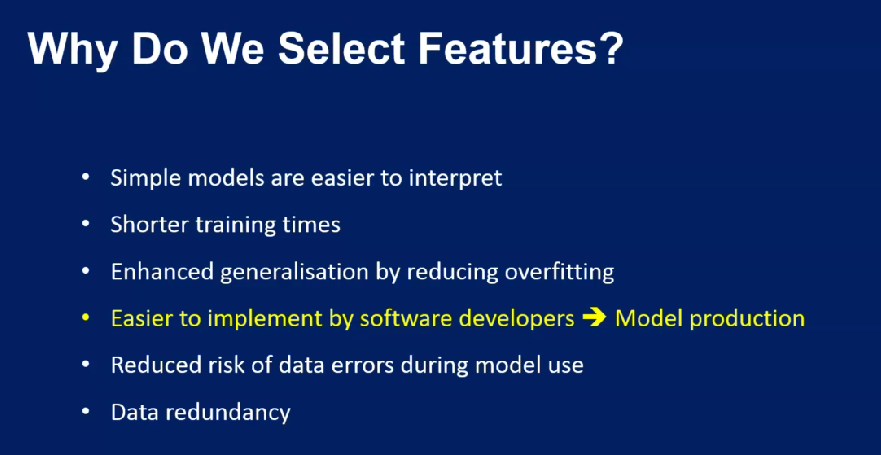

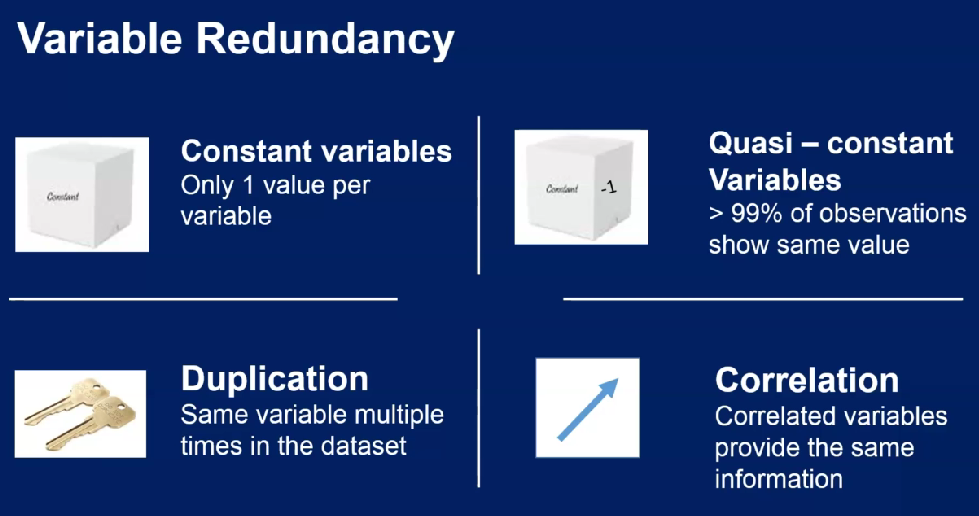

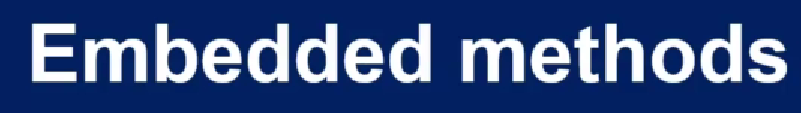

### calculate the correlation matrix for all variables

C:\Users\Honor\anaconda3\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


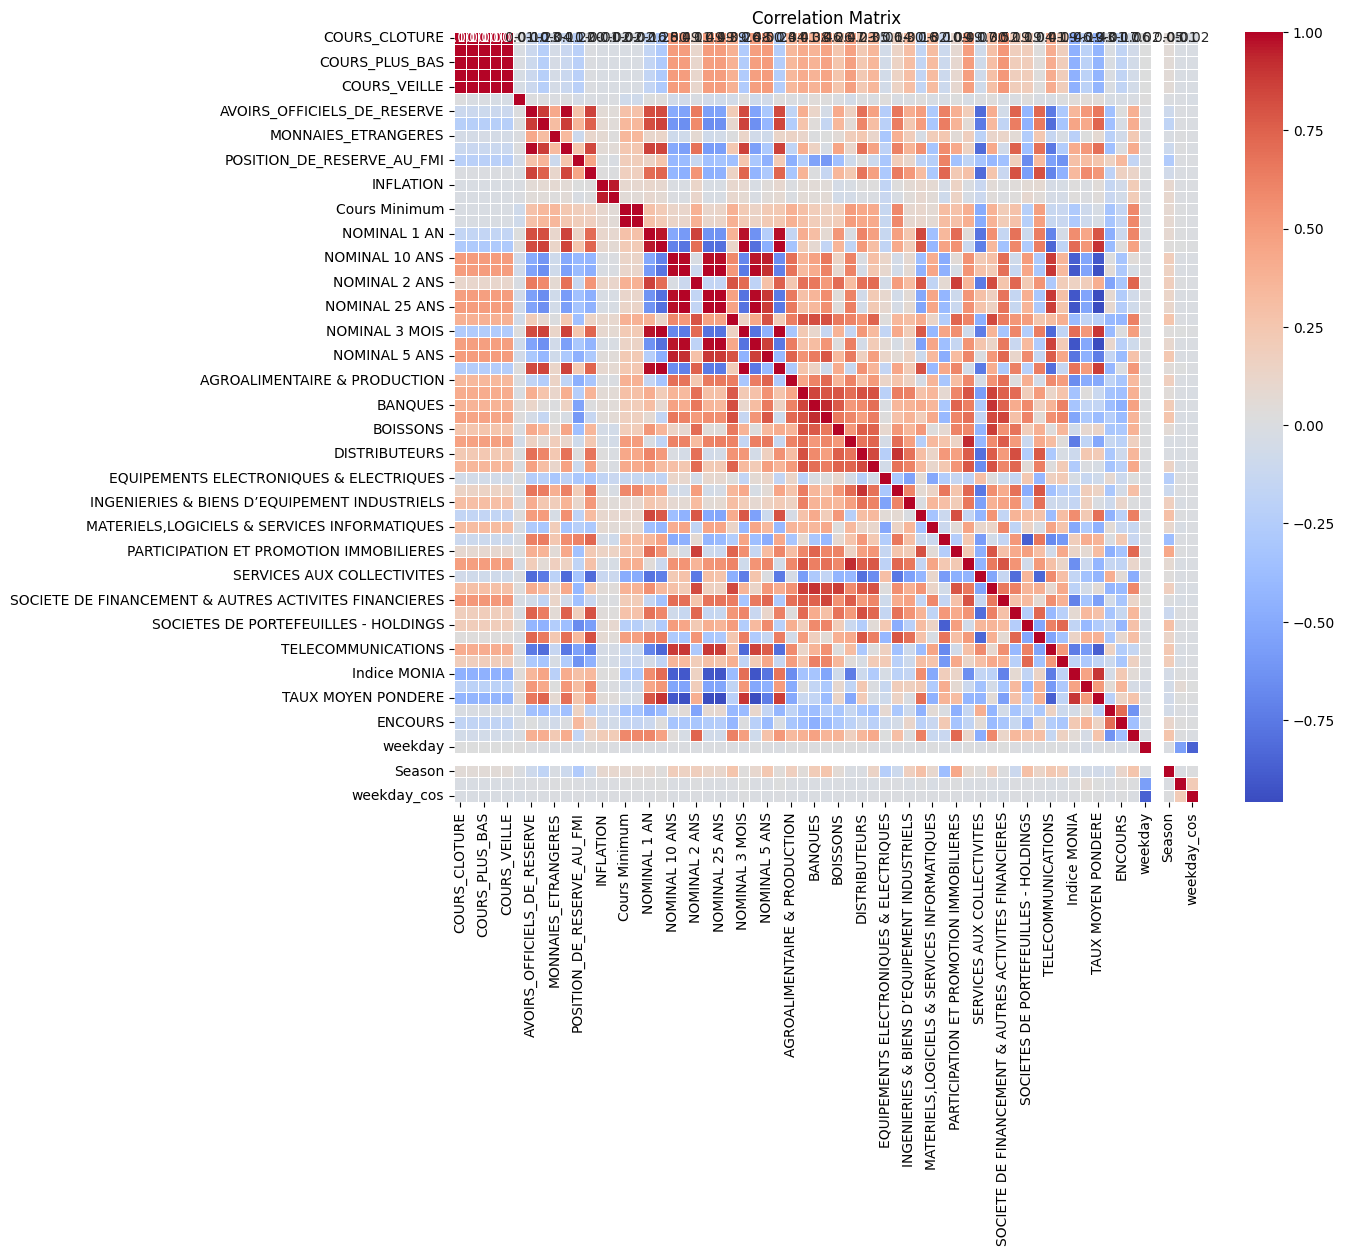

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Set the correlation threshold
correlation_threshold = 0.95

# Find highly correlated variable pairs
highly_correlated_pairs = []
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col_i, col_j, correlation_value))

# Print the highly correlated variable pairs
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} are highly correlated with a coefficient of {pair[2]:.2f}")


COURS_CLOTURE and COURS_PLUS_HAUT are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_PLUS_BAS are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_CLOTURE and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_PLUS_BAS are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_PLUS_HAUT and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_PLUS_BAS and COURS_OUVERTURE are highly correlated with a coefficient of 1.00
COURS_PLUS_BAS and COURS_VEILLE are highly correlated with a coefficient of 1.00
COURS_OUVERTURE and COURS_VEILLE are highly correlated with a coefficient of 1.00
AVOIRS_OFFICIELS_DE_RESERVE and DEPOTS_ET_TITRES are highly correlated with a coefficient of 0.99
INFLATION and INFLATION_SOUS_JACENTE are highly correlated with a coefficien

### Remove One of the Highly Correlated Variables:

In Our case, variables like COURS_PLUS_HAUT, COURS_PLUS_BAS, COURS_OUVERTURE, and COURS_VEILLE are highly correlated with COURS_CLOTURE with a coefficient of 1.00. I can choose to keep only one of these variables and drop the others.

In [16]:
# List of highly correlated variable pairs
correlated_pairs_to_drop = [
    ('COURS_CLOTURE', 'COURS_PLUS_HAUT'),
    ('COURS_CLOTURE', 'COURS_PLUS_BAS'),
    ('COURS_CLOTURE', 'COURS_OUVERTURE'),
    ('COURS_CLOTURE', 'COURS_VEILLE'),
    ('COURS_PLUS_HAUT', 'COURS_PLUS_BAS'),
    ('COURS_PLUS_HAUT', 'COURS_OUVERTURE'),
    ('COURS_PLUS_HAUT', 'COURS_VEILLE'),
    ('COURS_PLUS_BAS', 'COURS_OUVERTURE'),
    ('COURS_PLUS_BAS', 'COURS_VEILLE'),
    ('COURS_OUVERTURE', 'COURS_VEILLE'),
    ('AVOIRS_OFFICIELS_DE_RESERVE', 'DEPOTS_ET_TITRES'),
    ('INFLATION', 'INFLATION_SOUS_JACENTE'),
    ('Cours Minimum', 'Cours Maximum'),
    ('NOMINAL 1 AN', 'NOMINAL 1 MOIS'),
    ('NOMINAL 1 AN', 'NOMINAL 3 MOIS'),
    ('NOMINAL 1 AN', 'NOMINAL 6 MOIS'),
    ('NOMINAL 1 MOIS', 'NOMINAL 3 MOIS'),
    ('NOMINAL 1 MOIS', 'NOMINAL 6 MOIS'),
    ('NOMINAL 10 ANS', 'NOMINAL 15 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 20 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 10 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 20 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 15 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 20 ANS', 'NOMINAL 25 ANS'),
    ('NOMINAL 20 ANS', 'NOMINAL 30 ANS'),
    ('NOMINAL 3 MOIS', 'NOMINAL 6 MOIS'),
]

        
# Create a set to keep track of dropped variables
dropped_variables = set()

# Drop one variable from each pair
for pair in correlated_pairs_to_drop:
    # Check if either variable in the pair exists in the DataFrame and has not been dropped
    if pair[0] in df.columns and pair[0] not in dropped_variables:
        df.drop(pair[1], axis=1, inplace=True)
        dropped_variables.add(pair[1])
    elif pair[1] in df.columns and pair[1] not in dropped_variables:
        df.drop(pair[0], axis=1, inplace=True)
        dropped_variables.add(pair[0])

In [17]:
df.head()

,DATE,COURS_CLOTURE,VARIATION,AVOIRS_OFFICIELS_DE_RESERVE,OR_MONETAIRE,MONNAIES_ETRANGERES,POSITION_DE_RESERVE_AU_FMI,AVOIRS_EN_DTS,INFLATION,Cours Minimum,NOMINAL 1 AN,NOMINAL 10 ANS,NOMINAL 2 ANS,NOMINAL 3 ANS,NOMINAL 5 ANS,AGROALIMENTAIRE & PRODUCTION,ASSURANCES,BANQUES,BATIMENT & MATERIAUX DE CONSTRUCTION,BOISSONS,CHIMIE,DISTRIBUTEURS,ELECTRICITE,EQUIPEMENTS ELECTRONIQUES & ELECTRIQUES,INDUSTRIE PHARMACEUTIQUE,INGENIERIES & BIENS D’EQUIPEMENT INDUSTRIELS,LOISIRS ET HOTELS,"MATERIELS,LOGICIELS & SERVICES INFORMATIQUES",MINES,PARTICIPATION ET PROMOTION IMMOBILIERES,PETROLE & GAZ,SERVICES AUX COLLECTIVITES,SERVICES DE TRANSPORT,SOCIETE DE FINANCEMENT & AUTRES ACTIVITES FINANCIERES,SOCIETES DE PLACEMENT IMMOBILIER,SOCIETES DE PORTEFEUILLES - HOLDINGS,SYLVICULTURE & PAPIER,TELECOMMUNICATIONS,TRANSPORT,Indice MONIA,Volume JJ,TAUX MOYEN PONDERE,VOLUME JJ,ENCOURS,month,weekday,weekend,Season,weekday_sin,weekday_cos
177,2013-12-06,9240.41,-0.009317,349.865853,14.191342,11.426886,1.977989,18.955415,8.3,9.365992,154.593025,180.678428,158.508979,161.286817,167.263579,31801.412143,5006.905,13359.142381,18560.281667,14585.499286,4183.715536,38372.916488,2255.716369,2071.234494,5866.859762,88.522857,934.742083,2458.707679,22809.748393,5798.094524,15343.102381,1048.016558,4185.055714,7488.461369,1041.993571,5538.568929,29.415833,1368.041667,2414.6275,2.947966,8495.827586,2.991124,1762.846154,7030.650888,12,4,False,3,-8.660254e-01,-0.5
176,2013-12-09,9221.40,-0.002057,349.470283,14.174735,11.512905,1.977482,18.873953,8.3,9.364884,154.547102,180.738401,158.469820,161.257384,167.257344,31796.374286,5003.180,13352.244762,18548.653333,14583.658571,4182.481071,38331.562976,2254.452738,2081.928539,5849.489524,88.395714,932.234167,2458.815357,22800.006786,5778.049048,15340.654762,1051.071129,4179.341429,7488.212738,1041.287143,5537.097857,29.351667,1372.593333,2414.3950,2.942931,8508.655172,2.982249,1765.692308,7031.301775,12,0,False,3,0.000000e+00,1.0
175,2013-12-10,9241.40,0.002169,349.074712,14.158127,11.598925,1.976975,18.792491,8.3,9.363775,154.501179,180.798374,158.430662,161.227952,167.251109,31791.336429,4999.455,13345.347143,18537.025000,14581.817857,4181.246607,38290.209464,2253.189107,2092.622584,5832.119286,88.268571,929.726250,2458.923036,22790.265179,5758.003571,15338.207143,1054.125701,4173.627143,7487.964107,1040.580714,5535.626786,29.287500,1377.145000,2414.1625,2.937897,8521.482759,2.973373,1768.538462,7031.952663,12,1,False,3,8.660254e-01,0.5
174,2013-12-11,9252.30,0.001179,348.679142,14.141520,11.684944,1.976468,18.711030,8.3,9.362667,154.455256,180.858347,158.391504,161.198519,167.244873,31786.298571,4995.730,13338.449524,18525.396667,14579.977143,4180.012143,38248.855952,2251.925476,2103.316629,5814.749048,88.141429,927.218333,2459.030714,22780.523571,5737.958095,15335.759524,1057.180272,4167.912857,7487.715476,1039.874286,5534.155714,29.223333,1381.696667,2413.9300,2.932862,8534.310345,2.964497,1771.384615,7032.603550,12,2,False,3,8.660254e-01,-0.5
173,2013-12-12,9320.66,0.007388,348.283571,14.124913,11.770964,1.975960,18.629568,8.3,9.361559,154.409333,180.918319,158.352345,161.169087,167.238638,31781.260714,4992.005,13331.551905,18513.768333,14578.136429,4178.777679,38207.502440,2250.661845,2114.010674,5797.378810,88.014286,924.710417,2459.138393,22770.781964,5717.912619,15333.311905,1060.234844,4162.198571,7487.466845,1039.167857,5532.684643,29.159167,1386.248333,2413.6975,2.927828,8547.137931,2.955621,1774.230769,7033.254438,12,3,False,3,1.224647e-16,-1.0


# <p style="border-radius: 10px; border: solid rgb(222, 184, 135); padding: 25px; background-color: rgb(255, 250, 240); font-size: 100%; color: rgb(82, 1, 122); text-align: center; --darkreader-inline-border-top: #744f20; --darkreader-inline-border-right: #744f20; --darkreader-inline-border-bottom: #744f20; --darkreader-inline-border-left: #744f20; --darkreader-inline-bgcolor: #3c2800; --darkreader-inline-color: #d177fe;">MODELING</p>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [32]:
df = df.copy()

X = df.drop(['COURS_CLOTURE','DATE',], axis=1)  # Features
# X = df.loc[:,["weekday"]]
y = df['COURS_CLOTURE']  # Target variable

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X, df.values.reshape(-1,1))


# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
x_test.shape

(991, 48)

<h1 class="alert alert-info">
Simple NN MODEL<h1>

In [21]:
x_train.shape

(3963, 48)

In [22]:
def NN_model_test():
    # Create a Sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(0.2))

    # Add hidden layers
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))

    # Add output layer
    model.add(Dense(units=1, activation='linear'))
    
    return model

In [23]:
def improved_NN_model():
    # Create a Sequential model
    model = Sequential()

    # Add input layer
    model.add(Dense(units=256, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dropout(0.3))  # Adjust dropout

    # Add hidden layers
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout

    # Add output layer
    model.add(Dense(units=1, activation='linear'))

    return model

In [24]:
from keras.optimizers import Adam
import sklearn.metrics as metrics


model = improved_NN_model()
model.summary()

custom_optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=custom_optimizer,
    loss='mean_absolute_error',
    metrics=['mae']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               12544     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [25]:
# Define callbacks

# Save weights only for best model
checkpointer = ModelCheckpoint(
    filepath = '../models/weights_best.h5', 
    verbose = 2, 
    save_best_only = True
)

retValNN = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test, y_test),
    epochs=50, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/50
114/124 [==========================>...] - ETA: 0s - loss: 8154.5054 - mae: 8154.5054 
Epoch 1: val_loss improved from inf to 1372.62549, saving model to ../models\weights_best.h5
124/124 [==============================] - 2s 5ms/step - loss: 7725.0889 - mae: 7725.0889 - val_loss: 1372.6255 - val_mae: 1372.6255
Epoch 2/50
 36/124 [=======>......................] - ETA: 0s - loss: 2519.9131 - mae: 2519.9131

C:\Users\Honor\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/124 [===========================>..] - ETA: 0s - loss: 2447.1255 - mae: 2447.1255
Epoch 2: val_loss improved from 1372.62549 to 1115.22815, saving model to ../models\weights_best.h5
124/124 [==============================] - 0s 4ms/step - loss: 2433.5361 - mae: 2433.5361 - val_loss: 1115.2281 - val_mae: 1115.2281
Epoch 3/50
103/124 [=======================>......] - ETA: 0s - loss: 2204.4458 - mae: 2204.4458
Epoch 3: val_loss did not improve from 1115.22815
124/124 [==============================] - 0s 3ms/step - loss: 2213.6794 - mae: 2213.6794 - val_loss: 1265.7015 - val_mae: 1265.7015
Epoch 4/50
109/124 [=========================>....] - ETA: 0s - loss: 2156.0728 - mae: 2156.0728
Epoch 4: val_loss did not improve from 1115.22815
124/124 [==============================] - 0s 4ms/step - loss: 2163.4609 - mae: 2163.4609 - val_loss: 1181.2457 - val_mae: 1181.2457
Epoch 5/50
114/124 [==========================>...] - ETA: 0s - loss: 2202.8994 - mae: 2202.8994
Epoch 5: val_loss improv

122/124 [============================>.] - ETA: 0s - loss: 2102.7808 - mae: 2102.7808
Epoch 30: val_loss did not improve from 809.32367
124/124 [==============================] - 1s 4ms/step - loss: 2104.1733 - mae: 2104.1733 - val_loss: 987.3636 - val_mae: 987.3636
Epoch 31/50
120/124 [============================>.] - ETA: 0s - loss: 2107.5720 - mae: 2107.5720
Epoch 31: val_loss did not improve from 809.32367
124/124 [==============================] - 1s 4ms/step - loss: 2109.9851 - mae: 2109.9851 - val_loss: 885.8585 - val_mae: 885.8585
Epoch 32/50
112/124 [==========================>...] - ETA: 0s - loss: 2085.0798 - mae: 2085.0798
Epoch 32: val_loss did not improve from 809.32367
124/124 [==============================] - 0s 4ms/step - loss: 2095.5786 - mae: 2095.5786 - val_loss: 1093.6017 - val_mae: 1093.6017
Epoch 33/50
113/124 [==========================>...] - ETA: 0s - loss: 2069.8110 - mae: 2069.8110
Epoch 33: val_loss improved from 809.32367 to 807.56616, saving model to ..

## Archetect : NN_model_test
- 5 epochs : loss: 7274735.0000 - mae: 2204.3425 - val_loss: 4265903.5000 - val_mae: 1686.3789
- 50 epochs: loss: 1525.7279 - mae: 1525.7279 - val_loss: 874.1859 - val_mae: 874.1859
<hr>
custom_optimizer: 0.001
- 50 epochs: loss: 1559.3093 - mae: 1559.3093 - val_loss: 835.0258 - val_mae: 835.0258
<hr>
custom_optimizer: 0.0001
- 50 epochs: loss: 1685.5854 - mae: 1685.5854 - val_loss: 986.6269 - val_mae: 986.6269
## Archetect : improved_NN_model_test
- loss: 1971.5782 - mae: 1971.5782 - val_loss: 833.5898 - val_mae: 833.5898

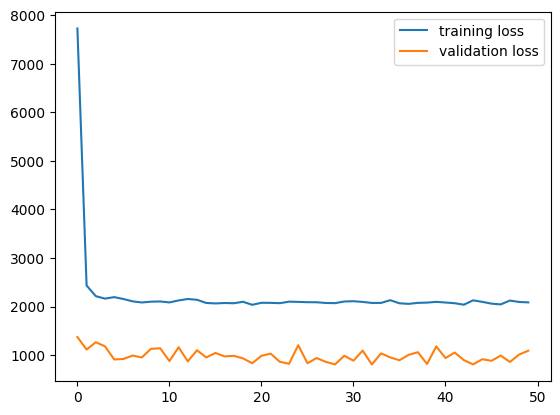

In [26]:
plt.plot(retValNN.history['loss'], label = 'training loss')
plt.plot(retValNN.history['val_loss'], label = 'validation loss')
plt.legend()

<hr>
<hr>

<h1 class="alert alert-info">
LSTM MODEL<h1>

In [27]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

def better_LSTM_model():
    model = Sequential()

    # Increase the number of LSTM units
    model.add(LSTM(units=256, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.5))  # Increase dropout rate

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1, activation='linear'))

    return model

In [31]:
x_train_lstm = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))

model_lstm = better_LSTM_model()
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [32]:
custom_optimizer = Adam(learning_rate=0.0001)  # Decrease the learning rate

model_lstm.compile(
    optimizer=custom_optimizer,
    loss='mean_absolute_error',
    metrics=['mae']
)

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

retVal = model_lstm.fit(
    x_train_lstm,
    y_train,
    validation_split=0.2,
    epochs=100,  # You can experiment with the number of epochs
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100
100/100 [==============================] - 10s 83ms/step - loss: 11102.7559 - mae: 11102.7559 - val_loss: 11145.8232 - val_mae: 11145.8232
Epoch 2/100
100/100 [==============================] - 9s 87ms/step - loss: 11142.2070 - mae: 11142.2070 - val_loss: 11144.9834 - val_mae: 11144.9834
Epoch 3/100
100/100 [==============================] - 8s 78ms/step - loss: 10595.6709 - mae: 10595.6709 - val_loss: 8233.0654 - val_mae: 8233.0654
Epoch 4/100
100/100 [==============================] - 8s 79ms/step - loss: 10758.2041 - mae: 10758.2041 - val_loss: 7793.9204 - val_mae: 7793.9204
Epoch 5/100
100/100 [==============================] - 8s 82ms/step - loss: 7715.1289 - mae: 7715.1289 - val_loss: 5420.8140 - val_mae: 5420.8140
Epoch 6/100
100/100 [==============================] - 8s 84ms/step - loss: 5049.3560 - mae: 5049.3560 - val_loss: 3620.6536 - val_mae: 3620.6536
Epoch 7/100
100/100 [==============================] - 9s 88ms/step - loss: 4037.1045 - mae: 4037.1045 - val_lo

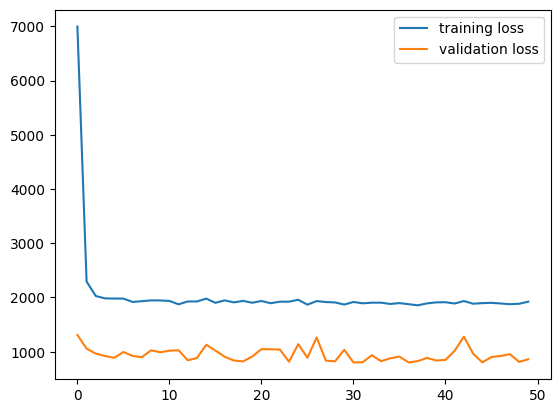

In [44]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.legend()

# Evaluation

In [45]:
# Generate price predictions using the LSTM model
predicted_prices = model_lstm.predict(x_test)

31/31 [==============================] - 1s 32ms/step


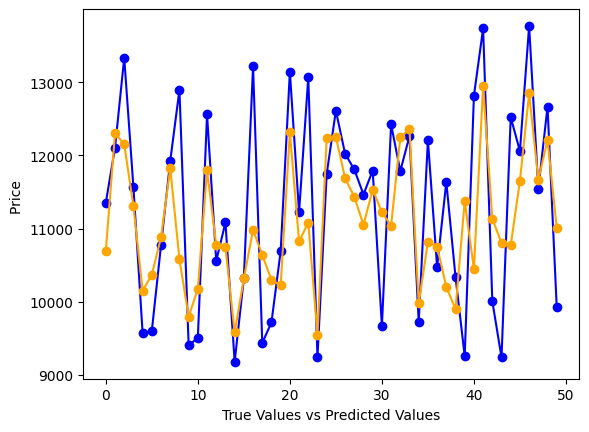

In [65]:
test_len = [i for i in range(len(y_test))]

number_of_samples = 50
plt.plot(test_len[:number_of_samples], y_test[:number_of_samples], color='blue', marker = 'o')
plt.plot(test_len[:number_of_samples], predicted_prices[:number_of_samples], color='orange', marker = 'o')

plt.xlabel('True Values vs Predicted Values')
plt.ylabel('Price ')
plt.show()


# Feature importance

In [85]:
# Print the summary of your model to see the names of the layers
model_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

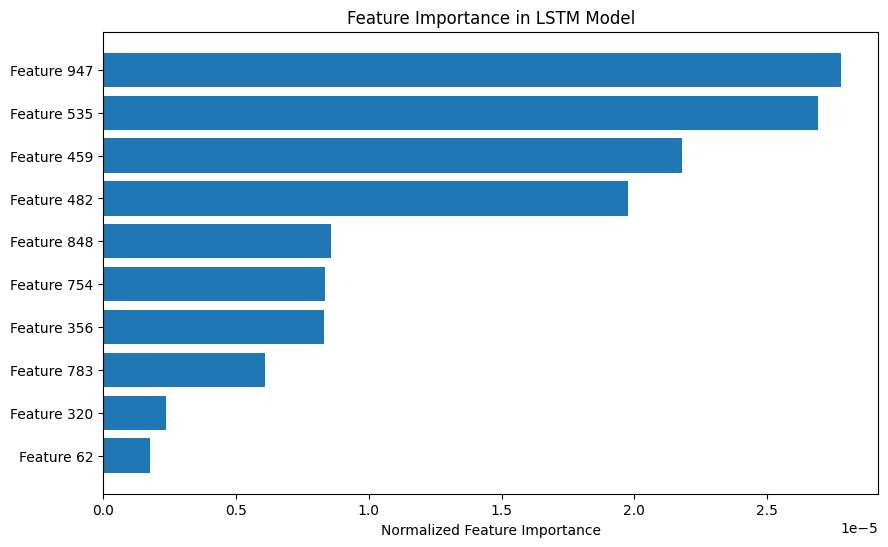

In [87]:
import matplotlib.pyplot as plt
import numpy as np


# Get the weights of the LSTM layer
lstm_layer = model_lstm.get_layer('lstm_1') 
weights = lstm_layer.get_weights()[0]

# Sum the weights for each feature across all time steps
feature_importance = np.sum(np.abs(weights), axis=0)

# Normalize the feature importance values
feature_importance /= np.sum(feature_importance)

# Get the feature names or indices
# Replace this with your actual feature names or indices
feature_names = [f'Feature {i}' for i in range(len(feature_importance))]

# Sort features based on importance
sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10])
plt.xlabel('Normalized Feature Importance')
plt.title('Feature Importance in LSTM Model')
plt.show()


In [96]:
feature_importance

array([0.00140172, 0.00204381, 0.00199175, ..., 0.00181321, 0.00163065,
       0.00092475], dtype=float32)

# Random forest

In [33]:
# Split the data into training and validation sets
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Make predictions on the validation set
pred_valid = model_rf.predict(x_test)

# Evaluate the model on the validation set
mae_valid = mean_absolute_error(y_test, pred_valid)
print(f'Mean Absolute Error on Validation Set: {mae_valid:.3f}')

# Make predictions on the test set
pred_test = model_rf.predict(x_test)

Mean Absolute Error on Validation Set: 92.337


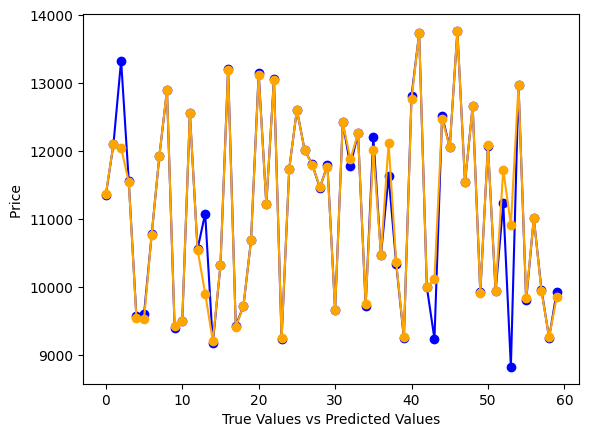

In [39]:
test_len = [i for i in range(len(y_test))]

number_of_samples = 60
plt.plot(test_len[:number_of_samples], y_test[:number_of_samples], color='blue', marker = 'o')
plt.plot(test_len[:number_of_samples], pred_test[:number_of_samples], color='orange', marker = 'o')

plt.xlabel('True Values vs Predicted Values')
plt.ylabel('Price ')
plt.show()

In [50]:
x_train_column = df.drop(['COURS_CLOTURE','DATE',], axis=1).columns

<Axes: >

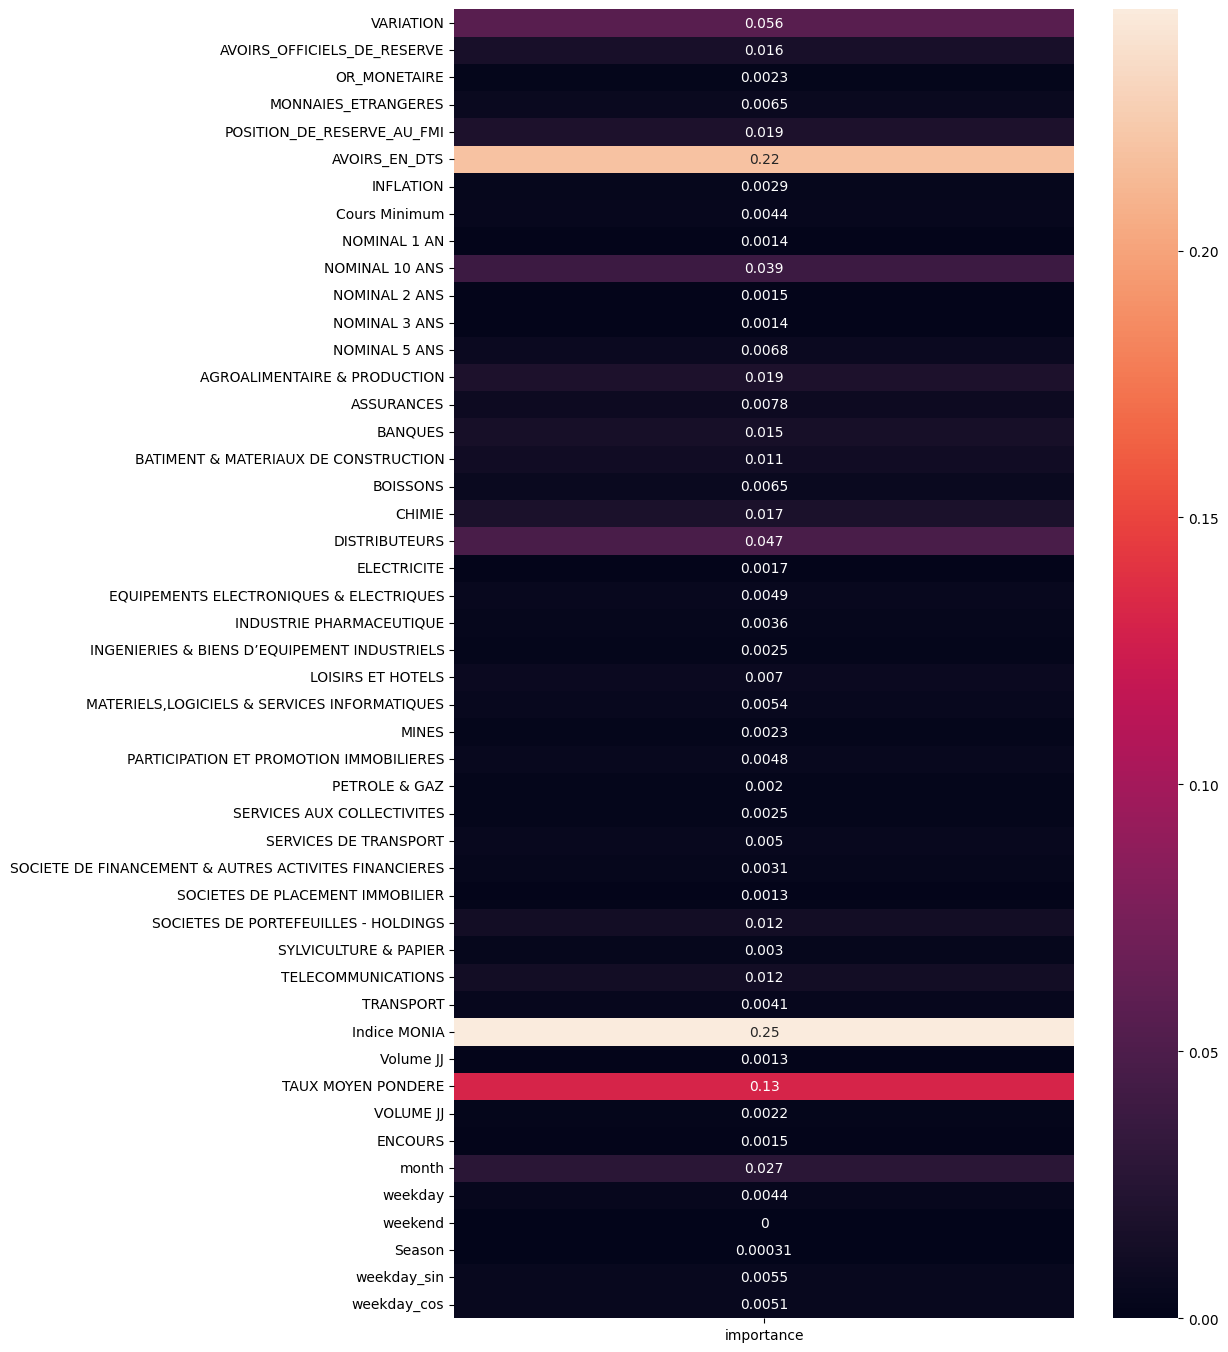

In [67]:
fi = pd.DataFrame(data=model_rf.feature_importances_,
             index=x_train_column,
             columns=['importance'])

fig, ax = plt.subplots(figsize=(10,17)) 
sns.heatmap(fi, annot=True, ax=ax)

In [68]:
fi

,importance
VARIATION,0.055713
AVOIRS_OFFICIELS_DE_RESERVE,0.015579
OR_MONETAIRE,0.002295
MONNAIES_ETRANGERES,0.006541
POSITION_DE_RESERVE_AU_FMI,0.018768
AVOIRS_EN_DTS,0.219287
INFLATION,0.002909
Cours Minimum,0.004407
NOMINAL 1 AN,0.001418
NOMINAL 10 ANS,0.038616


In [42]:
# Optional: Visualize feature importances
feature_importances = model_rf.feature_importances_
feature_names = [f'Feature {i}' for i in range(len(feature_importances))]

# sorted_indices = np.argsort(feature_importances)
# sorted_feature_importances = feature_importances[sorted_indices]
# sorted_feature_names = [feature_names[i] for i in sorted_indices]

# # Plot the feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(sorted_feature_names, sorted_feature_importances)
# plt.xlabel('Feature Importance')
# plt.title('Random Forest Feature Importance')
# plt.show()
feature_importances

array([0.05571322, 0.01557947, 0.00229467, 0.00654086, 0.01876821,
       0.21928688, 0.00290862, 0.00440692, 0.00141783, 0.03861585,
       0.00147126, 0.00139104, 0.00684546, 0.01857415, 0.00780473,
       0.01498627, 0.01132614, 0.00645332, 0.01726762, 0.04724571,
       0.0016575 , 0.00491189, 0.0036046 , 0.00251724, 0.00700106,
       0.00536472, 0.00226393, 0.00482236, 0.00200406, 0.00250144,
       0.00495342, 0.00306034, 0.00131232, 0.01228726, 0.00298883,
       0.01213651, 0.0040728 , 0.24518751, 0.00128945, 0.13099252,
       0.0021507 , 0.00145734, 0.02731875, 0.00435464, 0.        ,
       0.00031095, 0.00547903, 0.00510061])